This notebook contains the Bias correction (BC) process.

The user can choose either to correct precipitation (with the method BcsdPrecipitation(return_anoms=False), either temperature (with the method BcsdTemperature(return_anoms=False)).

The set of data is corrected following the following process: 

1) observation data and historic modeled data, both for the same period of time, are used to fit the model. Both set of data are at the emplacement of the closest NOAA meteorological station to the project
2) the data at the emplacement of the project is corrected by the fitted model. The data to correct is not at the same emplacement as the data use to fit the model. But, as explain previously, the data use to fit the model are at the emplecement of the closest NOAA station to the emplecement of the project

# User input

In [1]:
climate_var = 'tas' 

name_col_NOAA = 'TAVG'
name_col_mod_hist = 'Daily Near-Surface Air Temperature °C'
name_col_mod_proj = 'Daily Near-Surface Air Temperature °C'

unit='Celsius'
resolution = 'day'

start_y = 1970
stop_y = 2014
# precipitation : 'pr',name_col_NOAA = 'PRCP', name_col_mod_hist='Mean of the daily precipitation rate mm/day', name_col_mod_proj = 'Mean of the daily precipitation rate mm_per_day', unit = 'mm_per_day', resolution = 'day'
# temperature : 'tas', name_col_NOAA = 'TAVG', name_col_mod_proj = 'Daily Near-Surface Air Temperature °C', unit = 'Celsius', resolution = 'day'
# maximum temperature : 'tasmax', name_col_NOAA = 'TMAX', name_col_mod_proj = 'Daily Maximum Near-Surface Air Temperature °C', unit = 'Celsius', resolution = 'day'
# minimum temperature : 'tasmin', name_col_NOAA = 'TMIN', name_col_mod_proj = 'Daily Minimum Near-Surface Air Temperature °C', unit = 'Celsius', resolution = 'day'


# Import packages and functions

In [2]:
# import modules and functions

import pandas as pd
import numpy as np
import os
import os.path

import matplotlib.pyplot as plt

# import data
from Functions_ImportData import import_treat_modeled_NEX_GDDP_CMIP6
from Functions_ImportData import import_filtered_NOAA_obs
from Functions_ImportData import import_treat_obs_NOAA
from Functions_ImportData import import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA
from Bias_correction_function import BC
from Bias_correction_function import treat_data_for_test
from Bias_correction_function import BCSD_Precipitation_return_anoms_to_apply
from Bias_correction_function import BCSD_Temperature_return_anoms_to_apply
from Functions_Indicators import add_year_month_season

# Import data

In [3]:
# import observation data
data_obs_NOAA_filtered=import_filtered_NOAA_obs()

In [4]:
# import historic modeled data
climate_var_NEX_GDDP_CMIP6_EmplacementStation=import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA(climate_var, unit)

In [5]:
climate_var_NEX_GDDP_CMIP6_EmplacementStation

,Name station,Experiment,Model,Latitude,Longitude,Date,Daily Near-Surface Air Temperature °C,Year,Month,Season
0,"PEMBA, MZ",historical,ACCESS-CM2,-12.875,40.625,01-01-1970,26.529816,1970,Jan,Humid
1,"PEMBA, MZ",historical,ACCESS-CM2,-12.875,40.625,02-01-1970,26.452759,1970,Jan,Humid
2,"PEMBA, MZ",historical,ACCESS-CM2,-12.875,40.625,03-01-1970,26.615875,1970,Jan,Humid
3,"PEMBA, MZ",historical,ACCESS-CM2,-12.875,40.625,04-01-1970,27.353729,1970,Jan,Humid
4,"PEMBA, MZ",historical,ACCESS-CM2,-12.875,40.625,05-01-1970,27.634033,1970,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...
739615,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,27-12-2014,33.816254,2014,Dec,Humid
739616,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,28-12-2014,33.440704,2014,Dec,Humid
739617,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,29-12-2014,35.004974,2014,Dec,Humid
739618,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,30-12-2014,36.231445,2014,Dec,Humid


In [6]:
# import data to correct
climate_var_NEX_GDDP_CMIP6_Project=import_treat_modeled_NEX_GDDP_CMIP6(climate_var,unit,resolution,1950,2100)

In [7]:
climate_var_NEX_GDDP_CMIP6_Project

,Name project,Experiment,Model,Latitude,Longitude,Date,Daily Near-Surface Air Temperature °C,Year,Month,Season
0,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,01-01-1950,30.038757,1950,Jan,Humid
1,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,02-01-1950,30.407043,1950,Jan,Humid
2,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,03-01-1950,30.592712,1950,Jan,Humid
3,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,04-01-1950,31.287659,1950,Jan,Humid
4,WTP_Mutua_EIB,historical,ACCESS-CM2,-19.375,34.625,05-01-1950,25.517853,1950,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...
8963095,Pemba_EIB,ssp370,TaiESM1,-12.875,40.625,27-12-2100,35.812469,2100,Dec,Humid
8963096,Pemba_EIB,ssp370,TaiESM1,-12.875,40.625,28-12-2100,35.473541,2100,Dec,Humid
8963097,Pemba_EIB,ssp370,TaiESM1,-12.875,40.625,29-12-2100,34.798248,2100,Dec,Humid
8963098,Pemba_EIB,ssp370,TaiESM1,-12.875,40.625,30-12-2100,33.925507,2100,Dec,Humid


In [8]:
# select years between which the data should be corrected. Usually, the data are not corrected for the same number of years over which the model was fitted
climate_var_NEX_GDDP_CMIP6_to_correct=climate_var_NEX_GDDP_CMIP6_EmplacementStation[climate_var_NEX_GDDP_CMIP6_EmplacementStation['Year'].between(start_y,stop_y)]

# Apply BC

In [9]:
# preprare list of model to BC
list_model=list(set(climate_var_NEX_GDDP_CMIP6_to_correct['Model']))
list_model.remove('NESM3') # this model has too much Nan to be interesting
list_model.remove('CMCC-CM2-SR5')
list_model.remove('TaiEMS1')

ValueError: list.remove(x): x not in list

In [10]:
climate_var_NEX_GDDP_CMIP6_to_correct

,Name station,Experiment,Model,Latitude,Longitude,Date,Daily Near-Surface Air Temperature °C,Year,Month,Season
0,"PEMBA, MZ",historical,ACCESS-CM2,-12.875,40.625,01-01-1970,26.529816,1970,Jan,Humid
1,"PEMBA, MZ",historical,ACCESS-CM2,-12.875,40.625,02-01-1970,26.452759,1970,Jan,Humid
2,"PEMBA, MZ",historical,ACCESS-CM2,-12.875,40.625,03-01-1970,26.615875,1970,Jan,Humid
3,"PEMBA, MZ",historical,ACCESS-CM2,-12.875,40.625,04-01-1970,27.353729,1970,Jan,Humid
4,"PEMBA, MZ",historical,ACCESS-CM2,-12.875,40.625,05-01-1970,27.634033,1970,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...
739615,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,27-12-2014,33.816254,2014,Dec,Humid
739616,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,28-12-2014,33.440704,2014,Dec,Humid
739617,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,29-12-2014,35.004974,2014,Dec,Humid
739618,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,30-12-2014,36.231445,2014,Dec,Humid


In [11]:
df_bc_corrected=pd.DataFrame()
for name_project in list(set(climate_var_NEX_GDDP_CMIP6_to_correct['Name station'])):
    # select data for one project
    climate_var_NEX_GDDP_CMIP6_Project_temp=climate_var_NEX_GDDP_CMIP6_to_correct[climate_var_NEX_GDDP_CMIP6_to_correct['Name station']==name_project]
    # depending on project, don t fit the model with the same station data
    name_station = name_project
    for scenario in list(set(climate_var_NEX_GDDP_CMIP6_to_correct['Experiment'])):
        # select data for one scenario
        climate_var_NEX_GDDP_CMIP6_Project_temp_2=climate_var_NEX_GDDP_CMIP6_Project_temp[climate_var_NEX_GDDP_CMIP6_Project_temp['Experiment']==scenario]
        for model in list_model:
            print('For '+name_project+', '+scenario+' and '+model)
            # select data for one model
            climate_var_NEX_GDDP_CMIP6_Project_temp_3=climate_var_NEX_GDDP_CMIP6_Project_temp_2[climate_var_NEX_GDDP_CMIP6_Project_temp_2['Model']==model]
            # concatenate observed and historic modeled data in one dataframe df
            df = treat_data_for_test(data_obs_NOAA_filtered,name_col_NOAA,climate_var_NEX_GDDP_CMIP6_EmplacementStation,name_col_mod_hist,name_station,model)
            # apply method; choose method based on if climate_var is precipitation or temperature
            # X is the modeled historic set of data used to fit the model
            # y is the observed set of data used to fit the model
            # out is the product of the bias correction
            if climate_var == 'pr':
                (X_pcp,y_pcp,out)=BCSD_Precipitation_return_anoms_to_apply(df,climate_var_NEX_GDDP_CMIP6_Project_temp_3[['Date',name_col_mod_proj]].dropna().reset_index(drop=True))
            else:
                (X_temp,y_temp,out)=BCSD_Temperature_return_anoms_to_apply(df,climate_var_NEX_GDDP_CMIP6_Project_temp_3[['Date',name_col_mod_proj]].dropna().reset_index(drop=True))
            out = out.reset_index() # date is no longer the index
            out['Name project']=name_project # impose the name of the project in the dataframe
            out['Experiment']=scenario # impose the name of the scenario in the dataframe
            out['Model']=model # impose the name of the model in the dataframe
            df_bc_corrected=pd.concat([df_bc_corrected,out]) # concat the result to the other results

For PEMBA, MZ, historical and ACCESS-ESM1-5
For PEMBA, MZ, historical and MPI-ESM1-2-LR
For PEMBA, MZ, historical and ACCESS-CM2
For PEMBA, MZ, historical and MPI-ESM1-2-HR
For PEMBA, MZ, historical and IITM-ESM
For PEMBA, MZ, historical and MIROC6
For PEMBA, MZ, historical and MRI-ESM2-0
For PEMBA, MZ, historical and BCC-CSM2-MR
For PEMBA, MZ, historical and CMCC-ESM2
For PEMBA, MZ, historical and TaiESM1
For PEMBA, MZ, historical and CanESM5
For PEMBA, MZ, historical and NorESM2-MM
For PEMBA, MZ, historical and NorESM2-LM
For BEIRA, MZ, historical and ACCESS-ESM1-5
For BEIRA, MZ, historical and MPI-ESM1-2-LR
For BEIRA, MZ, historical and ACCESS-CM2
For BEIRA, MZ, historical and MPI-ESM1-2-HR
For BEIRA, MZ, historical and IITM-ESM
For BEIRA, MZ, historical and MIROC6
For BEIRA, MZ, historical and MRI-ESM2-0
For BEIRA, MZ, historical and BCC-CSM2-MR
For BEIRA, MZ, historical and CMCC-ESM2
For BEIRA, MZ, historical and TaiESM1
For BEIRA, MZ, historical and CanESM5
For BEIRA, MZ, histori

In [12]:
df_t = df_bc_corrected.copy(deep=True)

In [13]:
df_bc_corrected = df_bc_corrected.reset_index(drop=True) # reset index not to have several time the same index

In [14]:
df_bc_corrected['Date']=pd.to_datetime(df_bc_corrected[['Date']].Date,format='%Y-%d-%m')
df_bc_corrected['Date']=df_bc_corrected['Date'].astype(str)

In [15]:
df_bc_corrected

,Date,Daily Near-Surface Air Temperature °C,Name project,Experiment,Model
0,1970-01-01,27.482143,"PEMBA, MZ",historical,ACCESS-ESM1-5
1,1970-01-02,26.789739,"PEMBA, MZ",historical,ACCESS-ESM1-5
2,1970-01-03,25.866278,"PEMBA, MZ",historical,ACCESS-ESM1-5
3,1970-01-04,27.041472,"PEMBA, MZ",historical,ACCESS-ESM1-5
4,1970-01-05,28.509544,"PEMBA, MZ",historical,ACCESS-ESM1-5
...,...,...,...,...,...
640774,2014-12-27,23.872419,"CHIMOIO, MZ",historical,NorESM2-LM
640775,2014-12-28,23.250268,"CHIMOIO, MZ",historical,NorESM2-LM
640776,2014-12-29,22.307480,"CHIMOIO, MZ",historical,NorESM2-LM
640777,2014-12-30,22.204916,"CHIMOIO, MZ",historical,NorESM2-LM


In [16]:
#df_bc_corrected=df_bc_corrected[['Date']].reset_index(drop=True)
#Time = df_bc_corrected[['Date']]
#df_bc_corrected[['Date']]= np.nan

In [17]:
# convert Date from datetime to str: this step is the longest, can take up to a full day of work
#for date in np.arange(0,len(df_bc_corrected[['Date']])):
#    df_bc_corrected.loc[date,'Date']=Time.loc[date,'Date'].date().strftime('%Y-%m-%d')

In [18]:
# add month, year and season. Will be usefull to apply CRVA
df_bc_corrected = add_year_month_season(df_bc_corrected,'Date')

In [19]:
df_bc_corrected

,Date,Daily Near-Surface Air Temperature °C,Name project,Experiment,Model,Year,Month,Season
0,1970-01-01,27.482143,"PEMBA, MZ",historical,ACCESS-ESM1-5,1970,Jan,Humid
1,1970-01-02,26.789739,"PEMBA, MZ",historical,ACCESS-ESM1-5,1970,Jan,Humid
2,1970-01-03,25.866278,"PEMBA, MZ",historical,ACCESS-ESM1-5,1970,Jan,Humid
3,1970-01-04,27.041472,"PEMBA, MZ",historical,ACCESS-ESM1-5,1970,Jan,Humid
4,1970-01-05,28.509544,"PEMBA, MZ",historical,ACCESS-ESM1-5,1970,Jan,Humid
...,...,...,...,...,...,...,...,...
640774,2014-12-27,23.872419,"CHIMOIO, MZ",historical,NorESM2-LM,2014,Dec,Humid
640775,2014-12-28,23.250268,"CHIMOIO, MZ",historical,NorESM2-LM,2014,Dec,Humid
640776,2014-12-29,22.307480,"CHIMOIO, MZ",historical,NorESM2-LM,2014,Dec,Humid
640777,2014-12-30,22.204916,"CHIMOIO, MZ",historical,NorESM2-LM,2014,Dec,Humid


In [20]:
# for test

In [21]:
#column_date = 'Date'
#df = df_bc_corrected

In [22]:
r'''Year = df[[column_date]].values.reshape(len(df[[column_date]].values),)
Month = df[[column_date]].values.reshape(len(df[[column_date]].values),)
Season = df[[column_date]].values.reshape(len(df[[column_date]].values),)

if str(Year[1]).find('-')==2 or str(Year[1]).find('/')==2:
    for i in np.arange(0,len(df[[column_date]].values)):
        Year[i]=int(Year[i][6:10])
        Month[i]=int(Month[i][3:5])
        if Month[i]>3 and Month[i]<10: # dry season in Mozambique is between April and September
            Season[i]='Dry'
        else:# humid season is between October and March
            Season[i]='Humid'

        Month[i]=str_month(Month[i])

if str(Year[1]).find('-')==4 or str(Year[1]).find('/')==4:
    for i in np.arange(0,len(df[[column_date]].values)):
        Year[i]=int(Year[i][0:4])
        Month[i]=int(Month[i][5:7])
        if Month[i]>3 and Month[i]<10: # dry season in Mozambique is between April and September
            Season[i]='Dry'
        else:# humid season is between October and March
            Season[i]='Humid'

        Month[i]=str_month(Month[i])

df['Year'] = Year
df['Month'] = Month
df['Season'] = Season'''

"Year = df[[column_date]].values.reshape(len(df[[column_date]].values),)\nMonth = df[[column_date]].values.reshape(len(df[[column_date]].values),)\nSeason = df[[column_date]].values.reshape(len(df[[column_date]].values),)\n\nif str(Year[1]).find('-')==2 or str(Year[1]).find('/')==2:\n    for i in np.arange(0,len(df[[column_date]].values)):\n        Year[i]=int(Year[i][6:10])\n        Month[i]=int(Month[i][3:5])\n        if Month[i]>3 and Month[i]<10: # dry season in Mozambique is between April and September\n            Season[i]='Dry'\n        else:# humid season is between October and March\n            Season[i]='Humid'\n\n        Month[i]=str_month(Month[i])\n\nif str(Year[1]).find('-')==4 or str(Year[1]).find('/')==4:\n    for i in np.arange(0,len(df[[column_date]].values)):\n        Year[i]=int(Year[i][0:4])\n        Month[i]=int(Month[i][5:7])\n        if Month[i]>3 and Month[i]<10: # dry season in Mozambique is between April and September\n            Season[i]='Dry'\n        e

In [23]:
#Year

In [24]:
#df_bc_corrected

# Export result as csv file

In [25]:
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file'

In [26]:
if not os.path.isdir(os.path.join(path,climate_var,climate_var+'_'+unit+'_'+resolution+'_'+str(start_y)+'-'+str(stop_y)+'_BiasCorrected')):
    os.makedirs(os.path.join(path,climate_var,climate_var+'_'+unit+'_'+resolution+'_'+str(start_y)+'-'+str(stop_y)+'_BiasCorrected'))

In [27]:
df_bc_corrected.to_csv(os.path.join(path,climate_var,climate_var+'_'+unit+'_'+resolution+'_'+str(start_y)+'-'+str(stop_y)+'_BiasCorrected',climate_var+'_'+unit+resolution+str(start_y)+'-'+str(stop_y)+'_BiasCorrected_EmplacementStationNOAA.csv'))

In [ ]:
df=pd.read_csv(os.path.join(path,climate_var,climate_var+'_'+unit+'_'+resolution+'_'+str(start_y)+'-'+str(stop_y)+'_BiasCorrected',climate_var+'_'+unit+resolution+str(start_y)+'-'+str(stop_y)+'_BiasCorrected.csv'))

In [ ]:
df.drop('Unnamed: 0',axis=1)

In [ ]:
df_bc_corrected

In [ ]:
import seaborn as sns

In [ ]:
x_ = df_bc_corrected[(df_bc_corrected['Name project']=='Pemba_EIB') & (df_bc_corrected['Experiment']=='ssp245') & (df_bc_corrected['Model']=='ACCESS-CM2')][['Date']].reset_index()
y_ = df_bc_corrected[(df_bc_corrected['Name project']=='Pemba_EIB') & (df_bc_corrected['Experiment']=='ssp245') & (df_bc_corrected['Model']=='ACCESS-CM2')][['Mean of the daily precipitation rate mm_per_day']].reset_index()

In [ ]:
df_ = df_bc_corrected[(df_bc_corrected['Name project']=='Pemba_EIB') & (df_bc_corrected['Experiment']=='ssp245')& (df_bc_corrected['Model']=='ACCESS-CM2')][['Date','Mean of the daily precipitation rate mm_per_day']].reset_index()

In [ ]:
sns.lineplot(data=y_[['Mean of the daily precipitation rate mm_per_day']].values)#,x =x_,y=y_)

result precipitation
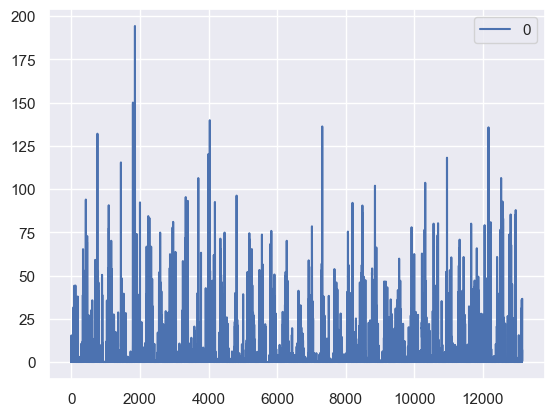

In [ ]:
x_